In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(42)
X = np.random.rand(1000, 10) 
y = X @ np.random.rand(10) + np.random.randn(1000) * 0.1  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
def build_model(use_hidden_layer=True):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(X_train.shape[1],)))  # Input layer
    
    if use_hidden_layer:
        model.add(keras.layers.Dense(64, activation="relu"))  # Hidden Layer
    
    model.add(keras.layers.Dense(1))  # Output Layer
    
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model

In [12]:
models = {"No Hidden Layer": build_model(False), "With Hidden Layer": build_model(True)}
history_dict = {}

for key in models:
    print(f"Training model: {key}")
    history = models[key].fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), verbose=0)
    history_dict[key] = history.history["val_loss"]


Training model: No Hidden Layer
Training model: With Hidden Layer


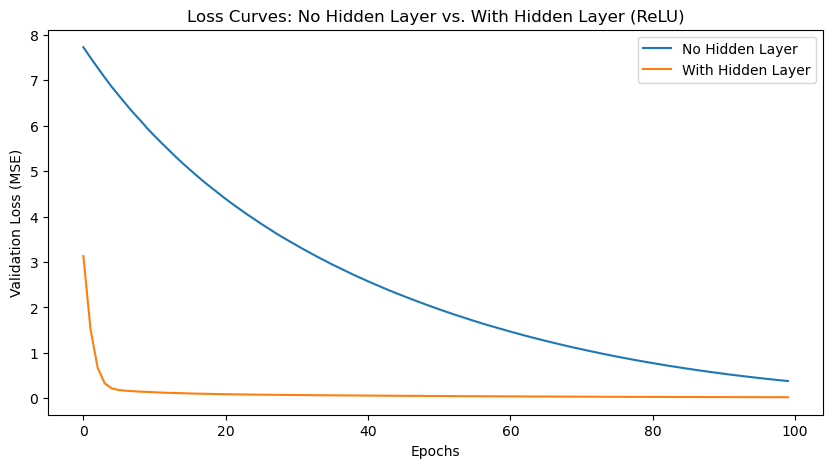

In [13]:
plt.figure(figsize=(10, 5))
for key, loss in history_dict.items():
    plt.plot(loss, label=key)

plt.xlabel("Epochs")
plt.ylabel("Validation Loss (MSE)")
plt.title("Loss Curves: No Hidden Layer vs. With Hidden Layer (ReLU)")
plt.legend()
plt.show()